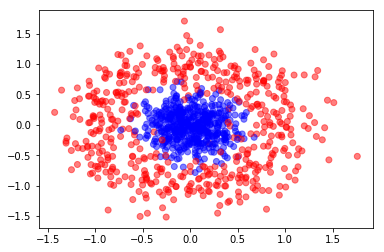

In [6]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import *
import sklearn.linear_model

dataset = make_circles(n_samples=1000, shuffle=True, noise=0.25, random_state=2, factor=0.01)
data, labels = dataset[0], dataset[1]
colors = ['red', 'blue']
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10)

In [8]:
class FCN():
    """This is the model class. Initialization should be done with the following command 
    
    FCN(input_data_dimension, [hidden_layer_1_dimension, hidden_layer_2_dimension, .... hidden_layer_L_dimension], output_dimension, task_type = "classification"/ "regression")
    """

    
    def __init__(self, start, layers, end):
        
        self.starting_dim = start
        self.hidden_dim = layers
        self.output_dim = end
        self.dimensions = [start] + layers + [end]
                        
        self.parameters = self.initialize_parameters()
        self.temps = {}
        self.grads = {}
        
    def initialize_parameters(self):
        dims = self.dimensions
        
        parameters = {}
            
        for i in range(1, len(dims)):
            parameters["W" + str(i)] = np.random.randn(dims[i], dims[i - 1]) * 0.01
            parameters["b" + str(i)] = np.zeros((dims[i], 1))

        return parameters
                
    def train(self, X, Y, iterations = 1000, learning_rate = 0.0001):
        for i in range(iterations):
            self.one_run(X, Y)
    
    def predict(self, X):
        return self.forward_prop(X)[0]
    
    def one_run(self, X, Y):
        A2, cache = self.forward_prop(X)
        
        self.temps = cache
        
        grads = self.back_prop(A2, X, Y)
        self.grads = grads
        self.parameters = self.update_params()
        
    def forward_prop(self, X):
        dims = self.dimensions
        
        parameters = self.parameters
        
        cache = {}
        cache["A0"] = X
        
        for i in range(1, len(dims) - 1):
            cache["Z" + str(i)] = np.dot(parameters["W" + str(i)], cache["A" + str(i - 1)]) + parameters["b" + str(i)]
            cache["A" + str(i)] = np.tanh(cache["Z" + str(i)])
        
        cache["Z" + str(len(dims) - 1)] = np.dot(parameters["W" + str(len(dims) - 1)], cache["A" + str(len(dims) - 2)]) + parameters["b" + str(len(dims) - 1)]
        cache["A" + str(len(dims) - 1)] = 1. / (1 + np.exp(- cache["Z" + str(len(dims) - 1)]))
        A2 = cache["A" + str(len(dims) - 1)]
        
        return A2, cache
    
    def back_prop(self, A, X, Y):
        
        parameters = self.parameters
        cache = self.temps
        dims = self.dimensions
        
        m = X.shape[1]

        grads = {}
        
        dZ = A - Y
        
        
        dW = (1. / m) * np.dot(dZ, cache["A" + str(len(dims) - 2)].T)
        db = (1. / m) * np.sum(dZ, axis = 1, keepdims= True)
        
        
        grads["W" + str(len(dims) - 1)] = dW
        grads["b" + str(len(dims) - 1)] = db
        
        for i in range(len(dims) - 2, 0, -1):

            dZ = np.multiply(np.dot(parameters["W" + str(i + 1)].T, dZ), 1 - np.power(cache["A" + str(i)], 2))
            dW = (1. / m) * np.dot(dZ, cache["A" + str(i - 1)].T)
            db = (1. / m) * np.sum(dZ, axis = 1, keepdims=True)
            
            grads["W" + str(i)] = dW
            grads["b" + str(i)] = db

        return grads
        
        
    def update_params(self, learning_rate = 0.1):
        parameters = self.parameters
        grads = self.grads
        
        for key in parameters.keys():
            parameters[key] = parameters[key] - learning_rate * grads[key]

        return parameters
    

In [10]:
m = FCN(2, [20, 20], 1)

m.train(X_train.T, y_train, iterations=50000)

print "Training Accuracy: {}".format(np.mean((m.predict(X_train.T).reshape(-1) > 0.5).astype(np.uint8) == y_train))

Training Accuracy: 0.646666666667
